In [55]:
import pandas as pd
import numpy as np
import seaborn as sns       
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import joblib


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [56]:
data = pd.read_csv("C:/Users/New Project/Desktop/MNA/Cursos/Fincomún/ML_data_housing.csv")              

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [58]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


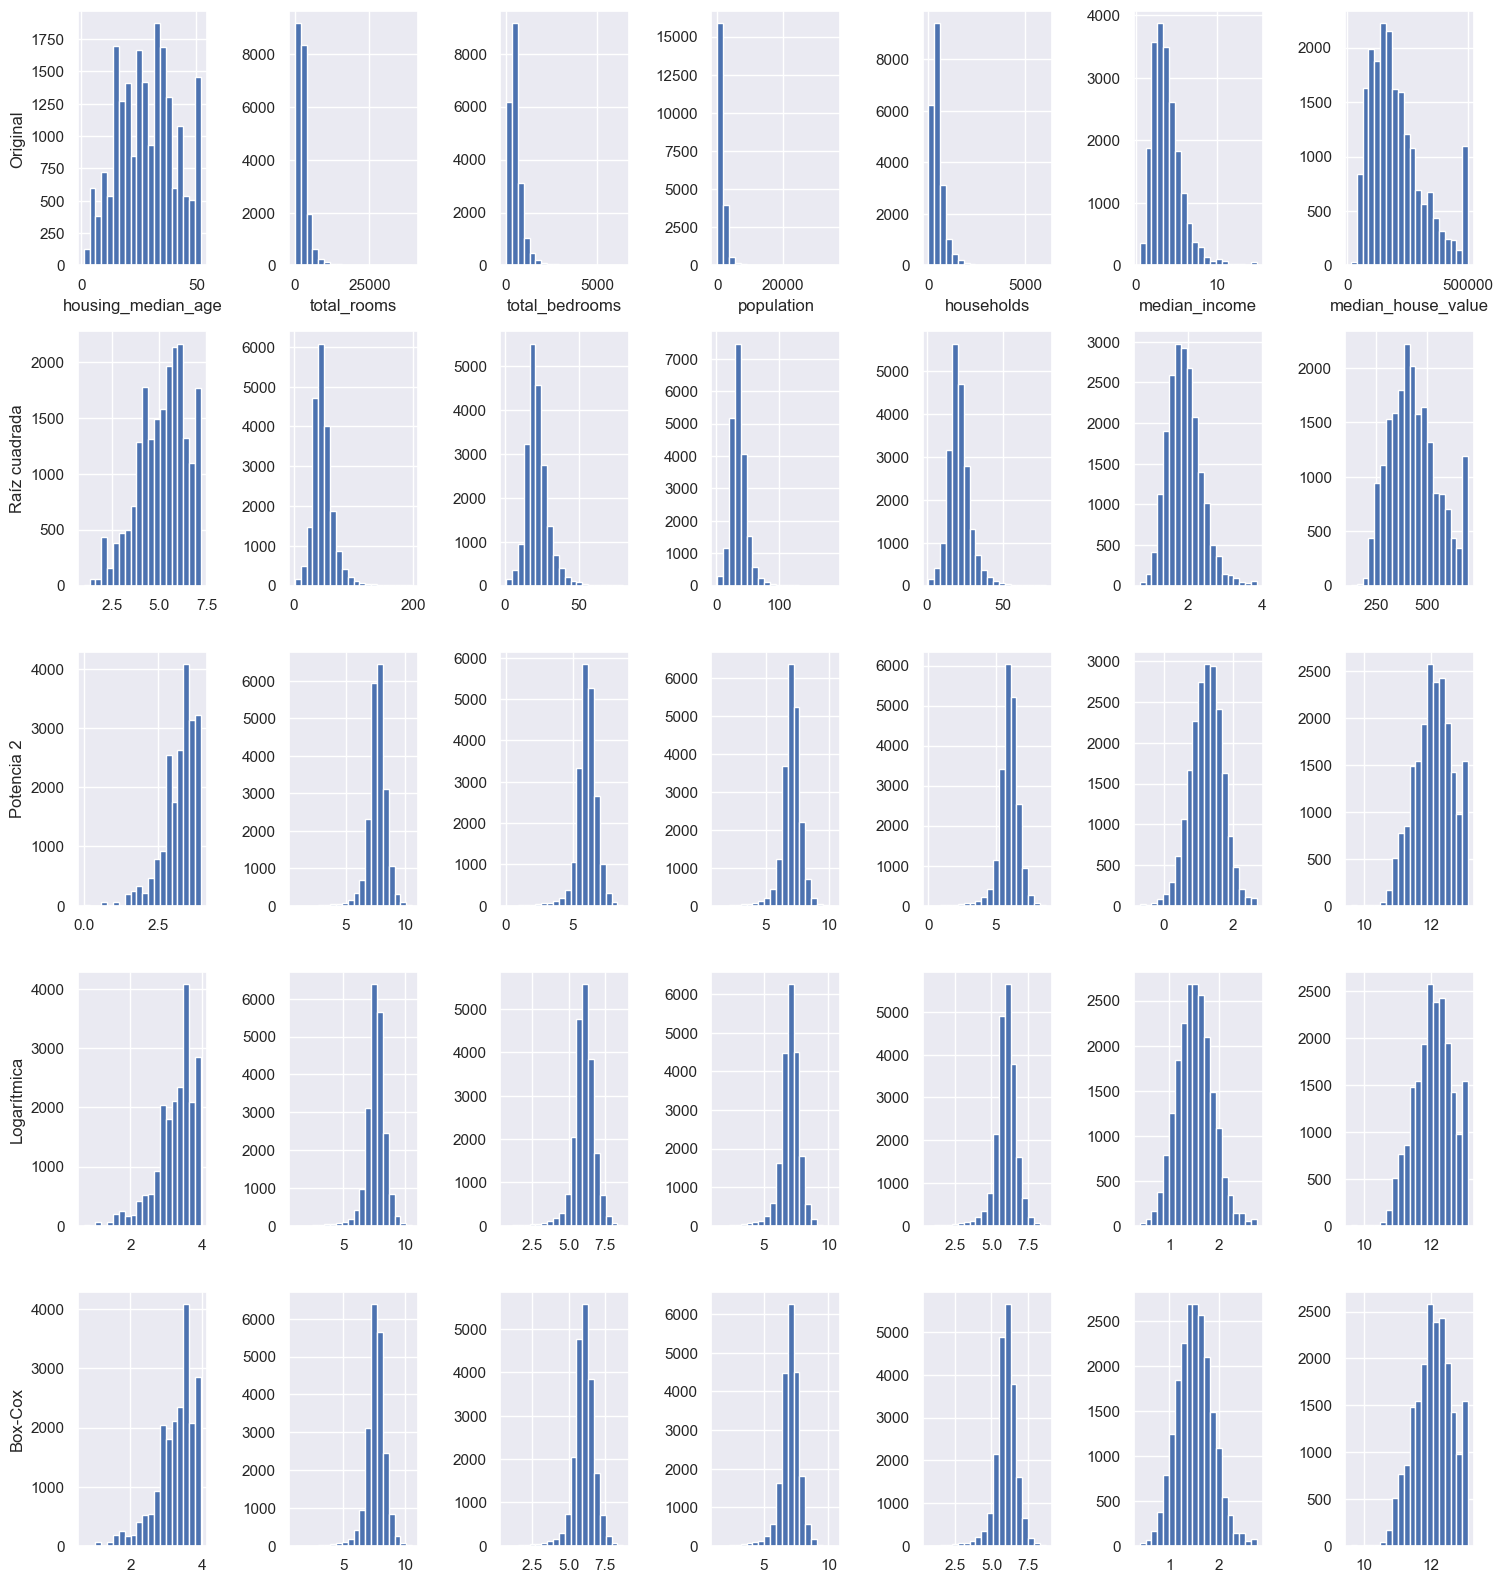

In [60]:
#Ya que tenemos una variable "Ocean_Proximity, no utilizaremos las columnas de latitud y longitud por redundancia.
data_prep = pd.get_dummies(data, columns=['ocean_proximity'])
numeric_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(5,7)

for k in range(0,7):
    plt.subplot(5,7,k+1)
    Transf_0 = data[numeric_columns[k]]
    plt.hist(Transf_0, bins=20)
    plt.xlabel(numeric_columns[k])
    if k==0:
        plt.ylabel('Original')
    
    plt.subplot(5,7,k+8)
    Transf_1 = np.sqrt(data[numeric_columns[k]])
    plt.hist(Transf_1, bins=20)
    if k==0:
        plt.ylabel('Raíz cuadrada')
        
    plt.subplot(5,7,k+15)
    Transf_2 = np.log(data[numeric_columns[k]])
    plt.hist(Transf_2, bins=20)
    if k==0:
        plt.ylabel('Potencia 2')

    plt.subplot(5,7,k+22)
    Transf_3 = np.log(data[numeric_columns[k]] + 1)
    plt.hist(Transf_3, bins=20)
    if k==0:
        plt.ylabel('Logarítmica')

    plt.subplot(5,7,k+29)
    Transf_4 = power_transform(data[numeric_columns[k]].values.reshape(-1,1), method='box-cox')
    plt.hist(Transf_3, bins=20)
    if k==0:
        plt.ylabel('Box-Cox')
        
plt.tight_layout()        
plt.show()

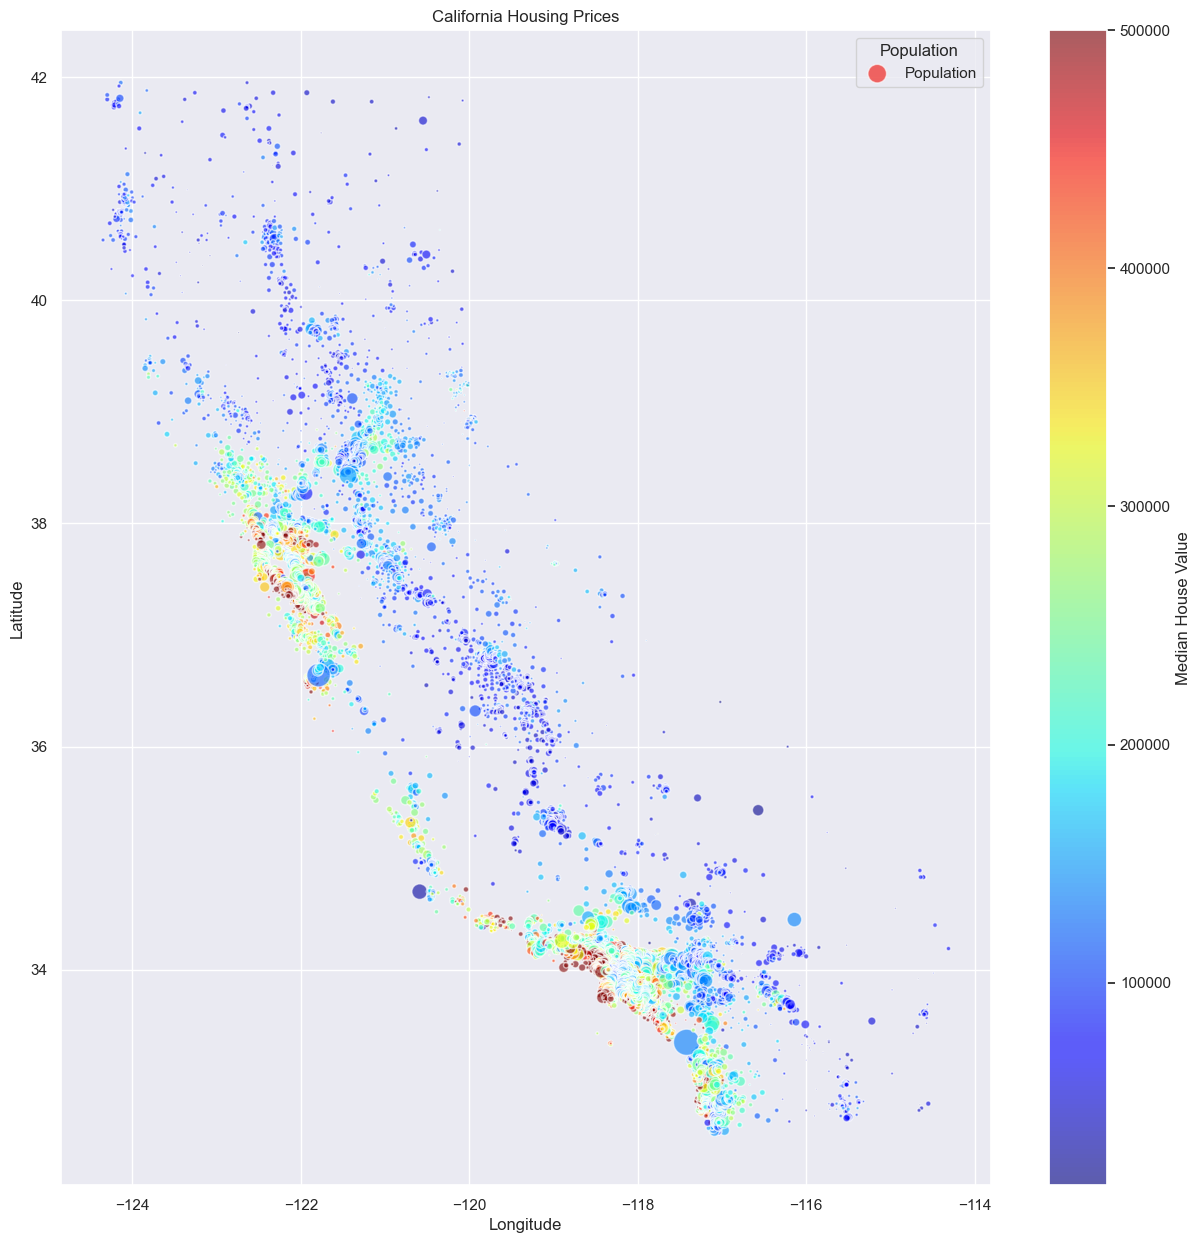

In [61]:
data_long = data['longitude']
data_lat = data['latitude']
sizes = data['population'] / 100  
colors = data['median_house_value']  

cmap = plt.get_cmap('jet')  
norm = mcolors.Normalize(vmin=colors.min(), vmax=colors.max())

fig, ax = plt.subplots(figsize=(15, 15)) 
scatter = ax.scatter(data_long, data_lat, c=colors, s=sizes, cmap=cmap, label='Population', alpha=0.6, edgecolors='w')

colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_label('Median House Value')
ax.grid(True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('California Housing Prices')
plt.legend(title='Population')

plt.show()

In [62]:
[data["ocean_proximity"].value_counts()]

[ocean_proximity
 <1H OCEAN     9136
 INLAND        6551
 NEAR OCEAN    2658
 NEAR BAY      2290
 ISLAND           5
 Name: count, dtype: int64]

In [63]:
data_prep = pd.get_dummies(data, columns=['ocean_proximity'])
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

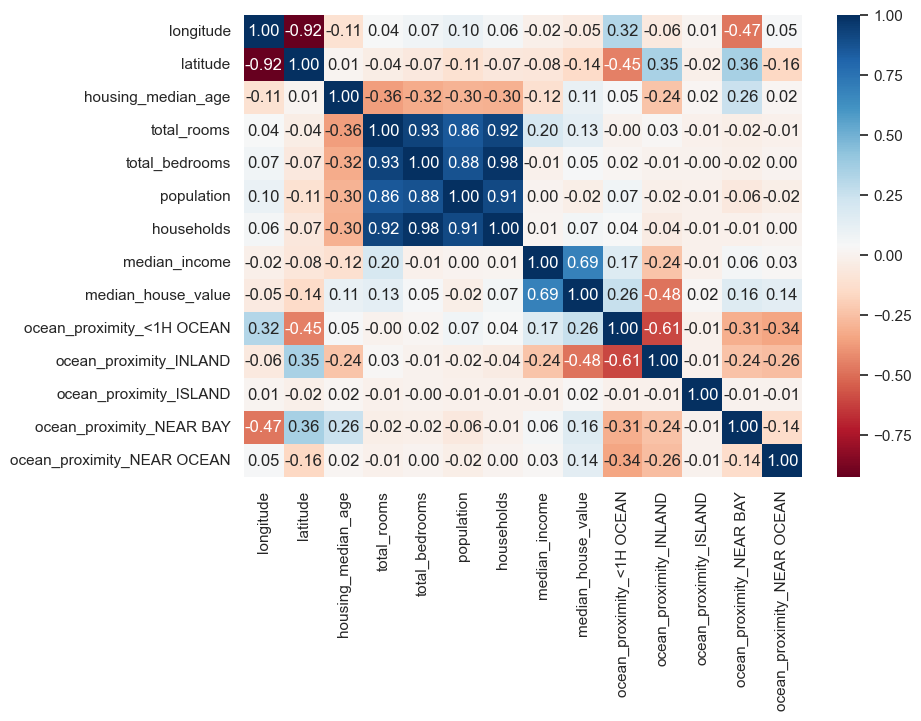

In [64]:
sns.set(rc={'figure.figsize':(9,6)})
sns.heatmap(data_prep.corr(), annot=True, fmt='.2f', cmap="RdBu")
plt.show()

In [65]:
numeric_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
categorical_columns = ['ocean_proximity']

In [66]:
X = data.drop('median_house_value', axis='columns')
y = data['median_house_value']
#70-15-15
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=7)


print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)


#def safe_log(x):
    #return np.log(x+1)

preprocessor_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler(feature_range=(1,2))),
    ('sqrt', FunctionTransformer(np.sqrt))
                             ]
)
preprocessor_cat = Pipeline([
    ('one_hot', OneHotEncoder())
                             ]
)

col_transf = ColumnTransformer(
    transformers=[
        ('num', preprocessor_num, numeric_columns),
        ('cat', preprocessor_cat, categorical_columns)
    ],
    remainder='passthrough'
)

Dimensiones:
Entrenamiento: (14448, 9) (14448,)
Prueba: (6192, 9) (6192,)


In [67]:
XtrainT = col_transf.fit_transform(Xtrain)
XtestT = col_transf.transform(Xtest)
print(XtrainT.shape)
print(XtestT.shape)

(14448, 13)
(6192, 13)


In [68]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [69]:
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Booster': GradientBoostingRegressor()
}

scores = {model_name: {'RMSE': [], 'MAE': [], 'MAPE': []} for model_name in modelos}

In [70]:
param_distributions_rf = {
    'n_estimators': [100, 200,500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [0.01,0.1, 1]
}

with joblib.parallel_backend(backend='threading', n_jobs=2):
    rf_random = RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_distributions=param_distributions_rf,
        n_iter=4,
        cv=3,
        verbose=2,
        random_state=7
    )

rf_random.fit(XtrainT, ytrain)
print(f"Mejores hiperparámetros para Random Forest: {rf_random.best_params_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   4.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=0.01, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=0.01, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=0.01, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   3.6s
[CV] END max_depth=30, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   3.9s
[CV] END max_depth=30, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   3.6s
[CV]

In [71]:
param_distributions_gb = {
    'n_estimators': [50, 200],  
    'learning_rate': [0.01,0.1, 0.2],  
    'max_depth': [None , 5, 10, 15],  
    'min_samples_split': [2, 10, 20],  
    'min_samples_leaf': [1, 5, 10] 
}

with joblib.parallel_backend('threading', n_jobs=2):
    gb_random = RandomizedSearchCV(
        estimator=GradientBoostingRegressor(random_state=7),
        param_distributions=param_distributions_gb,
        n_iter=20,
        cv=3,
        verbose=2,
        random_state=7
    )

gb_random.fit(XtrainT, ytrain)
print(f"Mejores hiperparámetros para Random Forest: {gb_random.best_params_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  12.1s
[CV] END learning_rate=0.01, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  12.1s
[CV] END learning_rate=0.01, max_depth=15, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  12.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   4.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=20, n_estimato

In [72]:
best_rf_model = rf_random.best_estimator_
modelos['Random Forest'] = best_rf_model

best_gb_model = gb_random.best_estimator_
modelos['Gradient Booster'] = best_gb_model

In [73]:
kf = KFold(n_splits=10, shuffle=True, random_state=7)

for nom_mod, modelo in modelos.items():
    for train_idx, val_idx in kf.split(XtrainT):
        
        Xtrain_split, Xval_split = XtrainT[train_idx], XtrainT[val_idx]
        ytrain_split, yval_split = ytrain.iloc[train_idx], ytrain.iloc[val_idx]
        
    
        modelo.fit(Xtrain_split, ytrain_split)
        
        y_pred_val = modelo.predict(Xval_split)
        scores[nom_mod]['RMSE'].append(RMSE(yval_split, y_pred_val))
        scores[nom_mod]['MAE'].append(MAE(yval_split, y_pred_val))
        scores[nom_mod]['MAPE'].append(MAPE(yval_split, y_pred_val))

for nom_mod, metricas in scores.items():
    print(f"Model: {nom_mod}")
    for metric_name, metric_scores in metricas.items():
        avg_score = np.mean(metric_scores)
        print(f"  Average {metric_name}: {avg_score:.4f}")

Model: Regresión Lineal
  Average RMSE: 68616.5424
  Average MAE: 49836.7400
  Average MAPE: 28.7870
Model: Random Forest
  Average RMSE: 50007.1104
  Average MAE: 32863.7091
  Average MAPE: 18.3991
Model: Gradient Booster
  Average RMSE: 47962.0252
  Average MAE: 32000.4364
  Average MAPE: 17.9859


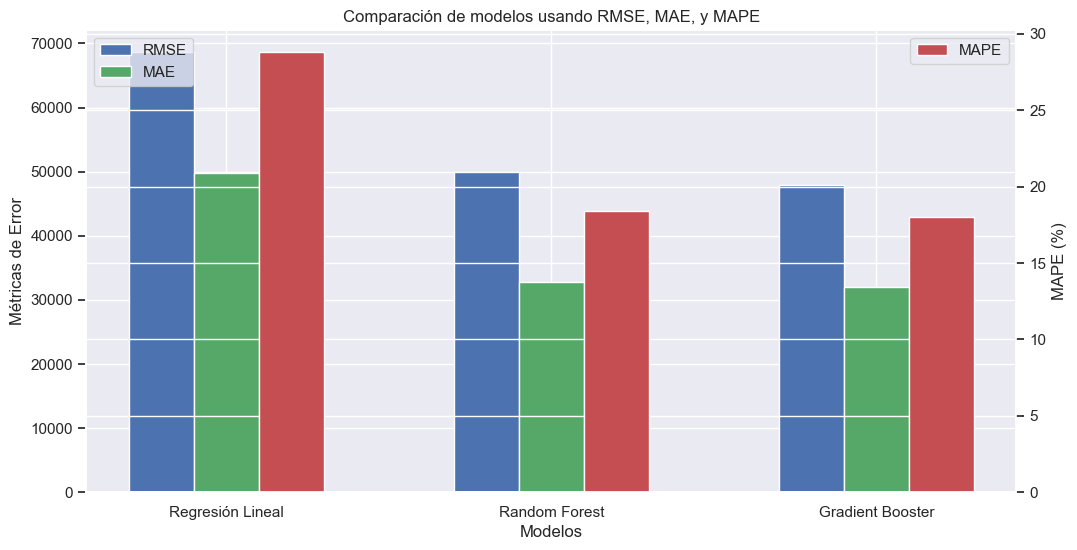

In [74]:
avg_scores = {model_name: {metric: np.mean(values) for metric, values in metrics.items()} for model_name, metrics in scores.items()}

models = list(avg_scores.keys())
rmse = [avg_scores[model]['RMSE'] for model in models]
mae = [avg_scores[model]['MAE'] for model in models]
mape = [avg_scores[model]['MAPE'] for model in models]

bar_width = 0.2
x = np.arange(len(models))
fig, ax1 = plt.subplots(figsize=(12, 6))
rects1 = ax1.bar(x - bar_width, rmse, bar_width, label='RMSE', color='b')
rects2 = ax1.bar(x, mae, bar_width, label='MAE', color='g')

ax2 = ax1.twinx()
rects3 = ax2.bar(x + bar_width, mape, bar_width, label='MAPE', color='r')

ax1.set_xlabel('Modelos')
ax1.set_ylabel('Métricas de Error')
ax2.set_ylabel('MAPE (%)')  # Correctly label your second y-axis
ax1.set_title('Comparación de modelos usando RMSE, MAE, y MAPE')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [75]:
y_pred_test = best_gb_model.predict(XtestT)
test_rmse = RMSE(ytest, y_pred_test)
test_mae = MAE(ytest, y_pred_test)
test_mape = MAPE(ytest, y_pred_test)

# Display the test set performance metrics
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")

Test RMSE: 48243.2598
Test MAE: 32223.0079
Test MAPE: 17.7393



El análisis realizado involucró una comparación de tres modelos predictivos: Regresión Lineal, Bosque Aleatorio (Random Forest) y Potenciación del Gradiente (Gradient Boosting), evaluados mediante tres métricas de error clave: el Error Cuadrático Medio (RMSE), el Error Absoluto Medio (MAE) y el Error Porcentual Absoluto Medio (MAPE)

Análisis de métricas del modelo GRADIENT BOOSTER.

Gradient Booster: Obtuvo el RMSE más bajo de todos los modelos, de igual forma, el MAE para este modelo es el más bajo de todos. Finalmente, y de igual manera, el MAPE es el más bajo de todos los modelos. En general, el modelo mejor calificado. Sin embargo, es importante mencionar que la diferencia entre los resultados del modelo Random Forest y Gradient Booster es similar. Por lo tanto, existe la oportunidad de evaluar los objetivos específicos del proyecto para decidir por un modelo u otro con base en otros factores además de las métricas de error

